<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/Writing-a-thesis/blob/main/5_4_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 선형회귀 심화
  - 경사하강법의 종류
  - 과대적합과 정규화
  - 사이킷런을 이용한 선형회귀


  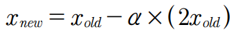

In [ ]:
# y = x**2
# y' = 2x

### 확률적 경사하강법
  
  - 장점
    - 업데이트가 빈번하게 이루어지기 때문에 성능변화를 빠르게 확인
    - 데이터의 특성에 따라서 훨씬 더 빠르게 결과값을 냄
    - 지역 최적화를 회피
  
  - 단점
    - 대용량 데이터인 경우에 시간이 오래걸린다
    - 흔히 튀는 현상이 발생해서 마지막에 결과 값을 확인하기 어려움



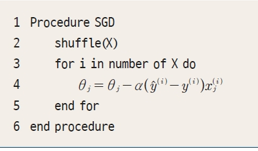

  - 미니 배치 경사하강법
    - 데이터의 랜덤한 일부분만 입력해서 경사도 평균을 구함
  - 에포크
    - 데이터를 한번에 학습시키는 횟수
      - ex : 전체 데이터를 학습에 투입한다고 하면, 학습 한번이 1 epoch
        - 미니배치의 배치크기가 20개씩이라면, (전체 100) 20 개씩 학습을 5번 해야 전체 데이터를 다 학습하고 이것이 1 epoch

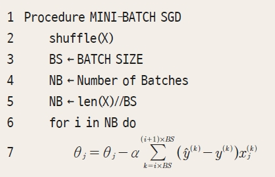

In [ ]:
import numpy as np
'''
class LinearRegressionGD(object):
    def __init__(self, fit_intercept=True, copy_X=True, eta0 = 0.001, epochs = 100, batch_size=1, weight_decay=0.9, shuffle=True):
        self.fit_intercept = fit_intercept
        self.copy_X = copy_X
        self._eta0 = eta0   ## 학습률(learning rate)
        self._epochs = epochs    ## 전체 데이터 반복횟수
        self._batch_size = batch_size     ## 뱃치 크기
        self._weight_decay = weight_decay    ## 가중치 감소  : 매 반목할때마다 학습률을 이 값으로 감소시킨다.
        self._cost_history = []
        self._coef = None
        self._intercept = None
        self._w_history = None
        self._new_X = None
        self._is_SGD = shuffle

    # 기울기 계산
    def gradient(self, X, y, theta) : # theta는 가중치
      return X.T.dot(self.hypothesis_function(X, theta) - y) / len(x)

    # 모델학습
    def fit(self, X, y):
      self._new_X = np.array(X)  # 데이터 할당
      y = y.reshape(-1,1)
      if self.fit_intercept:
        pass
      # 가중치 초기화
      theta_init = np.random.normal(0,1,self._X.shape[1])
      self._w_history = [theta_init]
      self._cost_history = [
          self.cost(self.hypothesis_function(self._new_X, theta_init), y)
      ]
'''

In [10]:
import numpy as np

class LinearRegressionGD(object):
    def __init__(self, fit_intercept=True, copy_X=True, eta0=0.001, epochs=100, batch_size=1, weight_decay=0.9, shuffle=True):
        self.fit_intercept = fit_intercept
        self.copy_X = copy_X
        self._eta0 = eta0   # 학습률(learning rate)
        self._epochs = epochs    # 전체 데이터 반복 횟수
        self._batch_size = batch_size  # 배치 크기
        self._weight_decay = weight_decay  # 가중치 감소
        self._cost_history = []
        self._coef = None
        self._intercept = None
        self._w_history = None
        self._new_X = None
        self._is_SGD = shuffle

    # 가설 함수 (예측 함수)
    def hypothesis_function(self, X, theta):
        return X.dot(theta)

    # 비용 함수 (MSE)
    def cost(self, h, y):
        return np.mean((h - y) ** 2) / 2

    # 기울기 계산
    def gradient(self, X, y, theta):
        return X.T.dot(self.hypothesis_function(X, theta) - y) / len(X)

    # 모델 학습
    def fit(self, X, y):
        self._new_X = np.array(X)  # 데이터 할당
        y = y.reshape(-1, 1)  # y를 열 벡터로 변환

        if self.fit_intercept:
            intercept = np.ones((self._new_X.shape[0], 1))
            self._new_X = np.hstack((intercept, self._new_X))

        # 가중치 초기화
        theta_init = np.random.normal(0, 1, self._new_X.shape[1]).reshape(-1, 1)
        self._w_history = [theta_init]
        self._cost_history = [
            self.cost(self.hypothesis_function(self._new_X, theta_init), y)
        ]

        # 에포크 반복
        for epoch in range(self._epochs):
            if self._is_SGD:
                # 데이터를 셔플
                indices = np.arange(self._new_X.shape[0])
                np.random.shuffle(indices)
                self._new_X = self._new_X[indices]
                y = y[indices]

            for i in range(0, self._new_X.shape[0], self._batch_size):
                X_batch = self._new_X[i:i + self._batch_size]
                y_batch = y[i:i + self._batch_size]

                # 기울기 계산
                grad = self.gradient(X_batch, y_batch, theta_init)

                # 가중치 업데이트
                theta_init = theta_init * self._weight_decay - self._eta0 * grad

                # 비용 계산 및 저장
                cost_value = self.cost(self.hypothesis_function(self._new_X, theta_init), y)
                self._cost_history.append(cost_value)
                self._w_history.append(theta_init)

        # 학습 완료 후 최종 가중치 저장
        self._coef = theta_init[1:].flatten()  # 절편 제외한 가중치
        self._intercept = theta_init[0]  # 절편

    # 예측 함수
    def predict(self, X):
        if self.fit_intercept:
            X = np.hstack((np.ones((X.shape[0], 1)), X))
        return self.hypothesis_function(X, np.vstack((self._intercept, self._coef.reshape(-1, 1))))

    # 비용 기록 반환
    def get_cost_history(self):
        return self._cost_history

    # 가중치 기록 반환
    def get_weights_history(self):
        return self._w_history


In [11]:
# 예제 데이터
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([3, 6, 9, 12, 15])

model = LinearRegressionGD(eta0=0.01, epochs=100, batch_size=2, weight_decay=0.9)
model.fit(X, y)

predictions = model.predict(np.array([[6], [7]]))

cost_history = model.get_cost_history()

weights_history = model.get_weights_history()

print("최종 가중치:", model._coef)
print("최종 절편:", model._intercept)
print("예측값:", predictions)


최종 가중치: [1.61017928]
최종 절편: [0.41751849]
예측값: [[10.07859415]
 [11.68877343]]


In [4]:
# dot 과 기울기

x = np.array([[1,2], [3,4], [5,6]]) # 3,2 형태의 입력데이터
theta = np.array([0.5, 1.5])
# 예측값
y_pred = x.dot(theta)
print(y_pred)


[ 3.5  7.5 11.5]


최종 가중치: [1.46793308]
최종 절편: [0.39893138]
예측값: [[ 9.20652988]
 [10.67446296]]


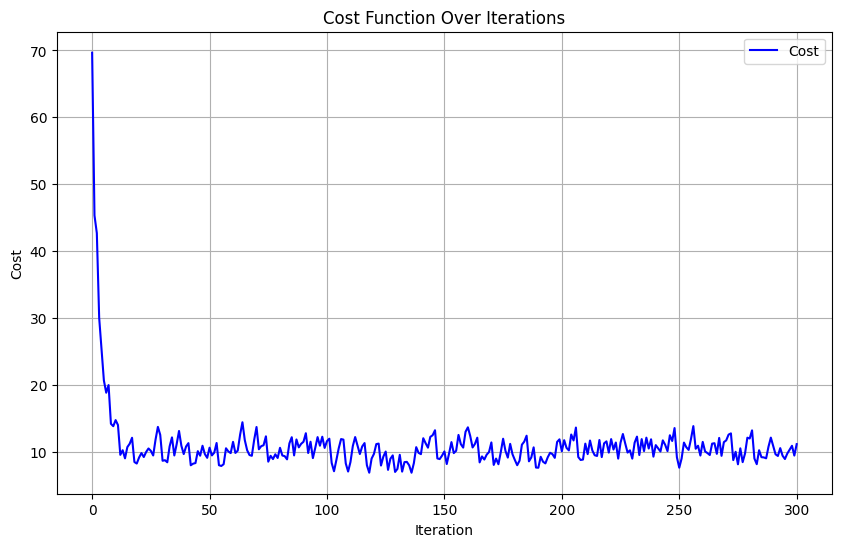

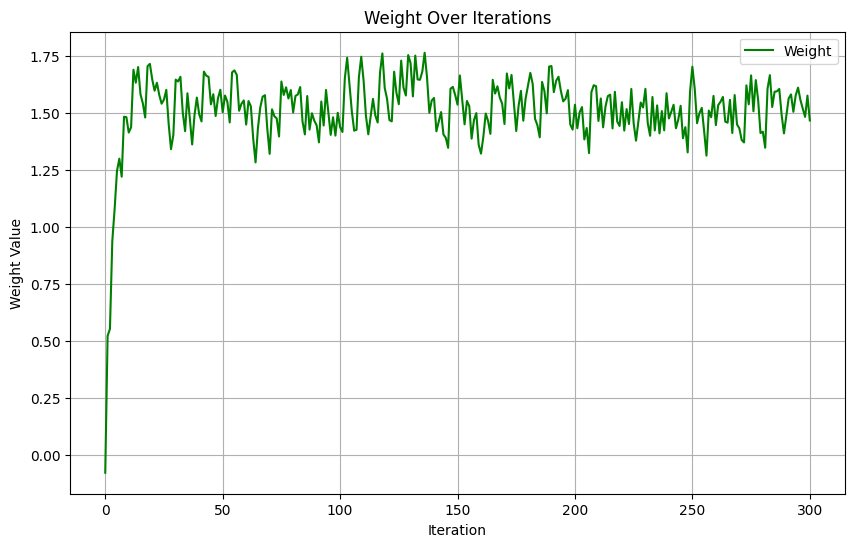

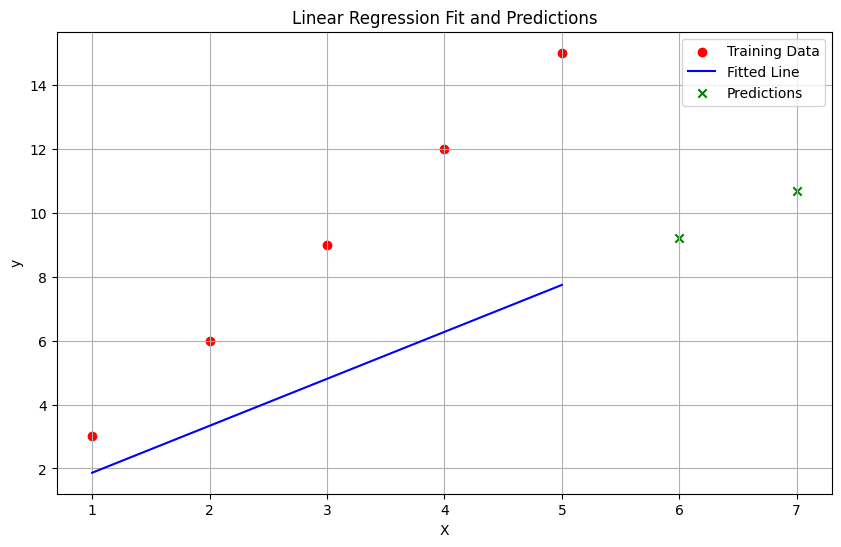

In [15]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([3, 6, 9, 12, 15])

model = LinearRegressionGD(eta0=0.01, epochs=100, batch_size=2, weight_decay=0.9)
model.fit(X, y)

predictions = model.predict(np.array([[6], [7]]))

cost_history = model.get_cost_history()

weights_history = model.get_weights_history()

print("최종 가중치:", model._coef)
print("최종 절편:", model._intercept)
print("예측값:", predictions)

plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_history)), cost_history, label="Cost", color='blue')
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function Over Iterations")
plt.grid(True)
plt.legend()
plt.show()

weights_history = np.array(weights_history)
plt.figure(figsize=(10, 6))
plt.plot(range(weights_history.shape[0]), weights_history[:, 1], label="Weight", color='green')
plt.xlabel("Iteration")
plt.ylabel("Weight Value")
plt.title("Weight Over Iterations")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="red", label="Training Data")
plt.plot(X, model.predict(X), color="blue", label="Fitted Line")
plt.scatter(np.array([[6], [7]]), predictions, color="green", label="Predictions", marker="x")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit and Predictions")
plt.grid(True)
plt.legend()
plt.show()


SGD(Stochastic Gradient Descent)
  - 전체데이터를 사용하는 것이 아니라 무작위로 선택된 작은 배치(미니 배치)를 사용해서 파라미터를 업데이트

In [ ]:
# 손실함수와 기울기 정의
# 손실함수 f(x) =  (w-3)**2
# 기울기 : 2(w-3)

In [9]:
def loss_function(w):
  return (w-3)**2
def gradient(w):
  return 2*(w-3)


In [89]:
def sgd(learning_rate = 0.01, num_iterations=100): # 학습률, 학습횟수
  # 초기화
  w = np.random.randint(-5,10)
  print(w)
  w_history = [w]
  for i in range(num_iterations):
    grad = gradient(w) # 현재 파라미터에 대한 기울기 계산
    w = w - learning_rate * grad # 파라미터 업데이트
    w_history.append(w)
    if i % 10 == 0 : # 매 10회 마다 손실 출력
      print(f'Iteration {i}: w = {w:.4f}, loss = {loss_function(w): .4f}')
  return w, w_history

In [94]:
final_w, w_history = sgd(learning_rate=0.01, num_iterations=100)

-4
Iteration 0: w = -3.8600, loss =  47.0596
Iteration 10: w = -2.6051, loss =  31.4174
Iteration 20: w = -1.5798, loss =  20.9745
Iteration 30: w = -0.7420, loss =  14.0027
Iteration 40: w = -0.0575, loss =  9.3483
Iteration 50: w = 0.5018, loss =  6.2410
Iteration 60: w = 0.9588, loss =  4.1666
Iteration 70: w = 1.3322, loss =  2.7816
Iteration 80: w = 1.6373, loss =  1.8570
Iteration 90: w = 1.8865, loss =  1.2398


In [91]:
w_history

[8,
 7.9,
 7.8020000000000005,
 7.70596,
 7.6118408,
 7.519603984000001,
 7.429211904320001,
 7.3406276662336,
 7.253815112908928,
 7.1687388106507495,
 7.085364034437735,
 7.00365675374898,
 6.923583618674001,
 6.845111946300521,
 6.768209707374511,
 6.69284551322702,
 6.61898860296248,
 6.546608830903231,
 6.4756766542851665,
 6.406163121199463,
 6.338039858775474,
 6.271279061599965,
 6.205853480367965,
 6.141736410760606,
 6.078901682545394,
 6.017323648894486,
 5.956977175916596,
 5.897837632398264,
 5.839880879750299,
 5.7830832621552934,
 5.727421596912188,
 5.672873164973944,
 5.619415701674465,
 5.567027387640976,
 5.515686839888156,
 5.465373103090393,
 5.416065641028585,
 5.367744328208013,
 5.320389441643853,
 5.273981652810976,
 5.228502019754757,
 5.183931979359661,
 5.140253339772468,
 5.097448272977019,
 5.055499307517478,
 5.014389321367129,
 4.974101534939786,
 4.93461950424099,
 4.89592711415617,
 4.858008571873047,
 4.820848400435586,
 4.784431432426874,
 4.74874280

손실함수 시각화

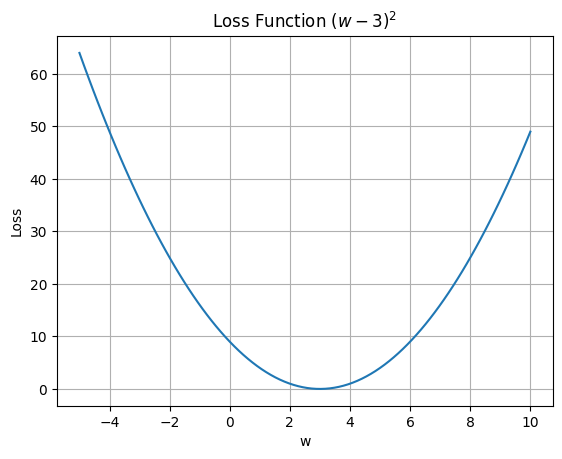

In [92]:
w_values = np.linspace(-5, 10, 100)
loss_values = loss_function(w_values)
plt.plot(w_values, loss_values)
plt.xlabel('w')
plt.ylabel('Loss')
plt.title('Loss Function $(w-3)^2$')
plt.grid(True)
plt.show()

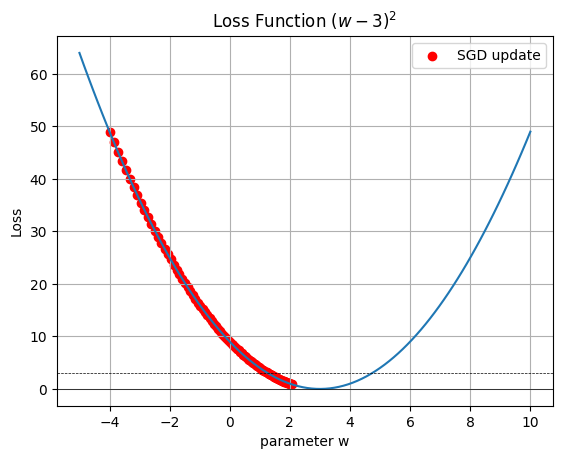

In [95]:
plt.scatter(w_history, [loss_function(w) for w in w_history], color = 'red', marker = 'o', label = 'SGD update')
plt.plot(w_values, loss_values)
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axhline(y=3, color='black', linewidth=0.5, linestyle = '--')
plt.xlabel('parameter w')
plt.ylabel('Loss')
plt.title('Loss Function $(w-3)^2$')
plt.grid(True)
plt.legend()
plt.show()

In [5]:
import numpy as np

class LinearRegressionGD(object):
    def __init__(self, fit_intercept=True, copy_X=True, eta0=0.001, epochs=100, batch_size=1, weight_decay=0.9, shuffle=True):
        self.fit_intercept = fit_intercept
        self.copy_X = copy_X
        self._eta0 = eta0
        self._epochs = epochs
        self._batch_size = batch_size
        self._weight_decay = weight_decay
        self._cost_history = []
        self._coef = None
        self._intercept = None
        self._w_history = []
        self._new_X = None
        self._is_SGD = shuffle

    def _initialize_weights(self, n_features):
        self._coef = np.zeros(n_features)
        if self.fit_intercept:
            self._intercept = 0.0

    def _shuffle_data(self, X, y):
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        return X[indices], y[indices]

    def _add_intercept(self, X):
        return np.c_[np.ones(X.shape[0]), X]

    def _compute_cost(self, X, y):
        errors = self._predict(X) - y
        cost = (1 / (2 * len(y))) * np.sum(errors ** 2)
        return cost

    def _predict(self, X):
        return X.dot(self._coef) + self._intercept

    def fit(self, X, y):
        if self.copy_X:
            X = X.copy()

        if self.fit_intercept:
            X = self._add_intercept(X)

        self._initialize_weights(X.shape[1])

        for epoch in range(self._epochs):
            if self._is_SGD:
                X, y = self._shuffle_data(X, y)

            for i in range(0, X.shape[0], self._batch_size):
                X_batch = X[i:i+self._batch_size]
                y_batch = y[i:i+self._batch_size]

                predictions = self._predict(X_batch)
                errors = predictions - y_batch

                gradient = X_batch.T.dot(errors) / len(y_batch)

                if self.fit_intercept:
                    intercept_gradient = np.sum(errors) / len(y_batch)
                    self._intercept -= self._eta0 * intercept_gradient

                self._coef -= self._eta0 * (gradient + self._weight_decay * self._coef)

            cost = self._compute_cost(X, y)
            self._cost_history.append(cost)
            self._w_history.append(self._coef.copy())

        return self

    def predict(self, X):
        if self.fit_intercept:
            X = self._add_intercept(X)
        return self._predict(X)

    def get_cost_history(self):
        return self._cost_history

    def get_weights_history(self):
        return self._w_history


최종 가중치: [ 2.54387405 -0.1581399 ]
최종 절편: 3.91508417270235
예측값: [6.45895823 6.14267842]


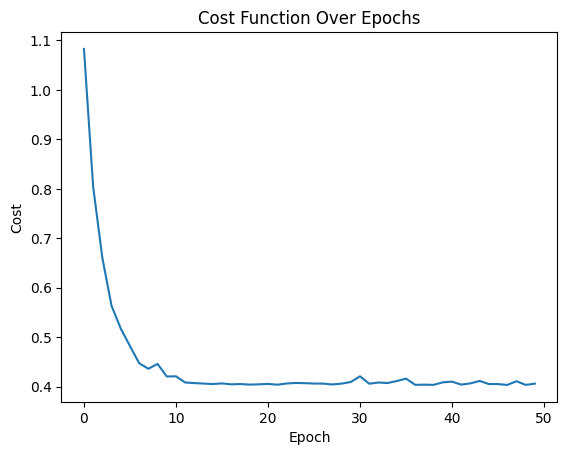

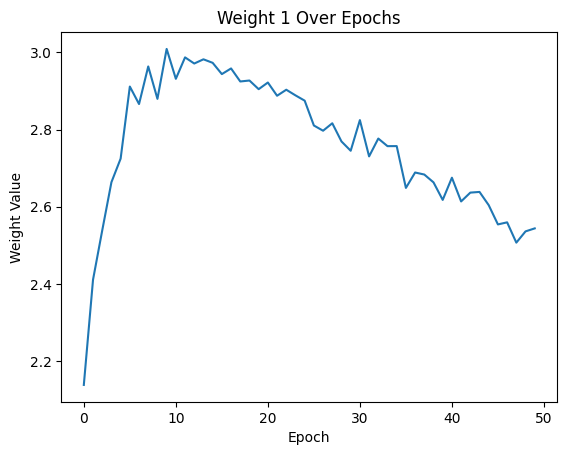

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1).ravel()  # y = 4 + 3X + 노이즈

# Ensure y is a 1D array
y = y.ravel()  # Flatten y to a 1D array

model = LinearRegressionGD(eta0=0.1, epochs=50, batch_size=10, weight_decay=0.01)
model.fit(X, y)

X_new = np.array([[0], [2]])
y_pred = model.predict(X_new)

cost_history = model.get_cost_history()

weights_history = model.get_weights_history()

print("최종 가중치:", model._coef)
print("최종 절편:", model._intercept)
print("예측값:", y_pred)

plt.plot(range(len(cost_history)), cost_history, label="Cost") # Remove the parentheses after cost_history
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost Function Over Epochs")
plt.show()

weights_history = np.array(weights_history)
plt.plot(range(weights_history.shape[0]), weights_history[:, 0], label="Weight 1")
plt.xlabel("Epoch")
plt.ylabel("Weight Value")
plt.title("Weight 1 Over Epochs")
plt.show()


에포크 추가

In [118]:
def sgd(learning_rate = 0.01, num_epochs = 20 , num_iterations_per_epoch=20):
  # 초기화
  w = np.random.randn()
  print(w)
  w_history = [] # 파라미터 값을 저장할 리스트
  epoch_history = [] # 에포크별 손실을 저장할 리스트
  for i in range(num_epochs):
    epoch_w_history = [] # 에포크 내의 파라미터 값을 저장할 리스트

    for iteration in range(num_iterations_per_epoch):
      grad = gradient(w) # 현재 파라미터에 대한 기울기 계산
      w = w - learning_rate * grad # 파라미터 업데이트
      epoch_w_history.append(w)  # 업데이트된 파라메터 저장

    w_history.extend(epoch_w_history)  # 전체 파라미터 이력 업데이트
    epoch_loss = [loss_function(w) for w in epoch_w_history]
    epoch_history.extend(epoch_loss)


    print(f'epoch {i}: w = {w:.4f}, loss = {np.mean(epoch_loss): .4f}')
  return w, w_history , epoch_history
# SGD 실행
final_w , w_history, epoch_history = sgd()

np.mean(np.array(epoch_history)) # Calculate the mean over the entire array since it is 1D

1.4535340771573169
epoch 0: w = 1.9676, loss =  1.6075
epoch 1: w = 2.3107, loss =  0.7165
epoch 2: w = 2.5398, loss =  0.3193
epoch 3: w = 2.6928, loss =  0.1423
epoch 4: w = 2.7949, loss =  0.0634
epoch 5: w = 2.8631, loss =  0.0283
epoch 6: w = 2.9086, loss =  0.0126
epoch 7: w = 2.9390, loss =  0.0056
epoch 8: w = 2.9593, loss =  0.0025
epoch 9: w = 2.9728, loss =  0.0011
epoch 10: w = 2.9818, loss =  0.0005
epoch 11: w = 2.9879, loss =  0.0002
epoch 12: w = 2.9919, loss =  0.0001
epoch 13: w = 2.9946, loss =  0.0000
epoch 14: w = 2.9964, loss =  0.0000
epoch 15: w = 2.9976, loss =  0.0000
epoch 16: w = 2.9984, loss =  0.0000
epoch 17: w = 2.9989, loss =  0.0000
epoch 18: w = 2.9993, loss =  0.0000
epoch 19: w = 2.9995, loss =  0.0000


0.14500321839966368

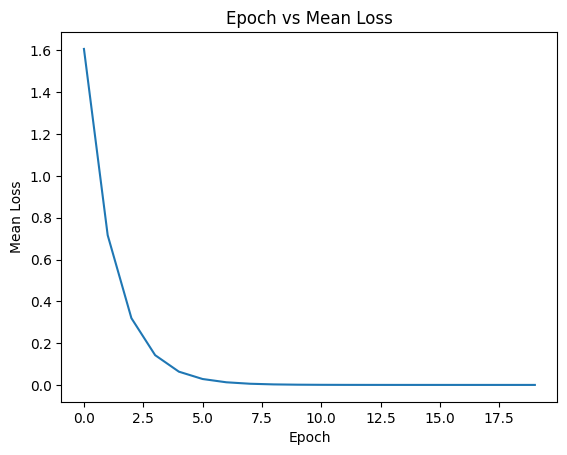

In [119]:
epoch_mean_loss = [np.mean(epoch_history[i:i+20]) for i in range(0, len(epoch_history), 20)]
plt.plot(range(len(epoch_mean_loss)), epoch_mean_loss) # Use len(epoch_mean_loss) to ensure matching lengths
plt.xlabel('Epoch')
plt.ylabel('Mean Loss')
plt.title('Epoch vs Mean Loss')
plt.show()

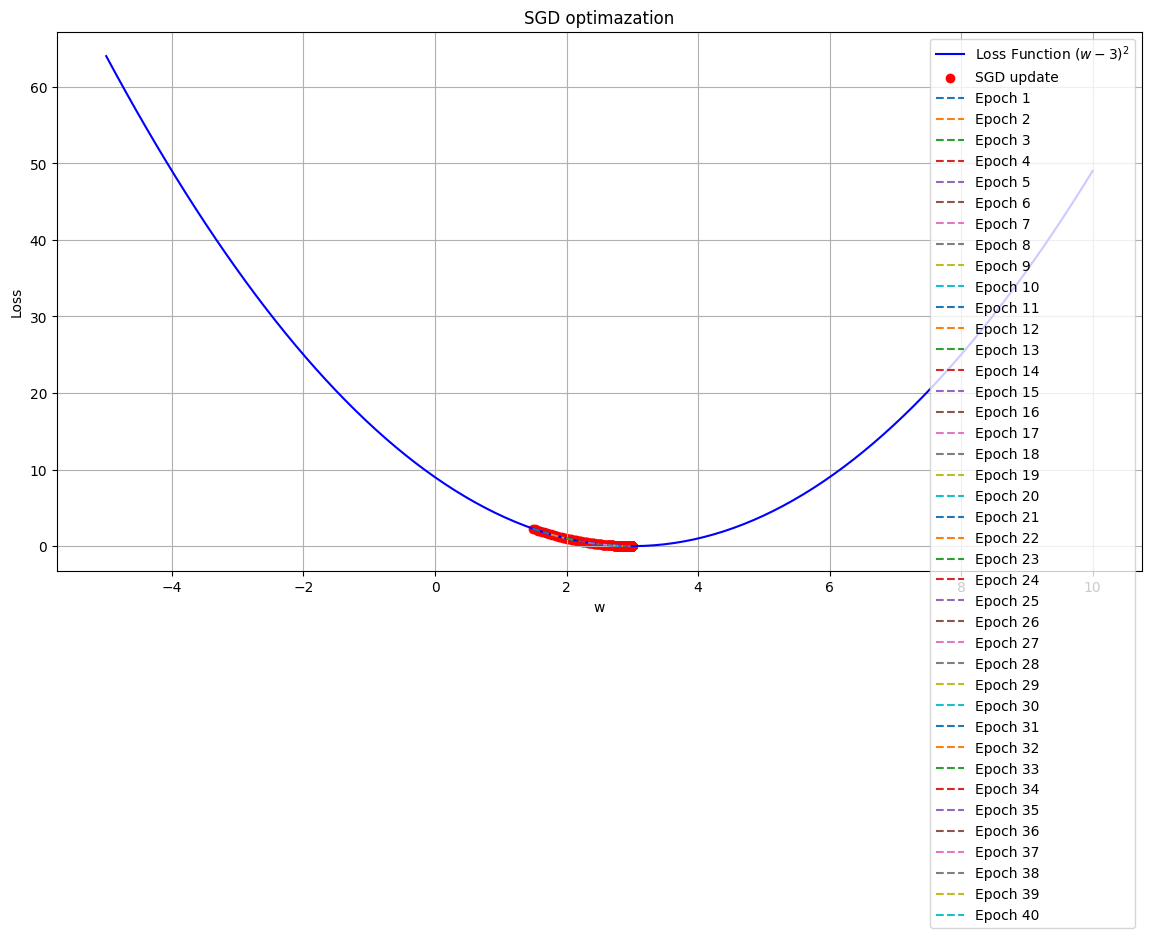

In [120]:
# 손실함수 시각화
w_value = np.linspace(-5, 10, 400)
loss_values = loss_function(w_values)
plt.figure(figsize=(14,7))
# 손실함수 그래프
plt.plot(w_values, loss_values, label = 'Loss Function $(w -3)^2$', color = 'blue')
# sgd 업데이트 경로
w_history = np.array(w_history)
loss_history = np.array([loss_function(w) for w in w_history])
plt.scatter(w_history, loss_history, color='red', marker = 'o', label='SGD update')

# 에포크별 손실 시각화
num_iterations_per_epoch = 10
for epoch in range(len(epoch_history)//num_iterations_per_epoch): # Iterate over epochs
    start = epoch * num_iterations_per_epoch
    end = (epoch + 1) * num_iterations_per_epoch
    epoch_w = w_history[start:end] # Get w_history for this epoch
    epoch_loss = epoch_history[start:end] # Get loss history for this epoch
    plt.plot(epoch_w, epoch_loss, linestyle='--', label=f'Epoch {epoch + 1}')
plt.title('SGD optimazation')
plt.xlabel('w')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [112]:
# 데이터 생성
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X[:5], y[:5]

(array([[0.74908024],
        [1.90142861],
        [1.46398788],
        [1.19731697],
        [0.31203728]]),
 array([[6.33428778],
        [9.40527849],
        [8.48372443],
        [5.60438199],
        [4.71643995]]))

(100, 1) (100, 1)
Epoch 0: Loss = 29.1488
Epoch 10: Loss = 1.0160
Epoch 20: Loss = 1.0043
Epoch 30: Loss = 0.9986
Epoch 40: Loss = 0.9956


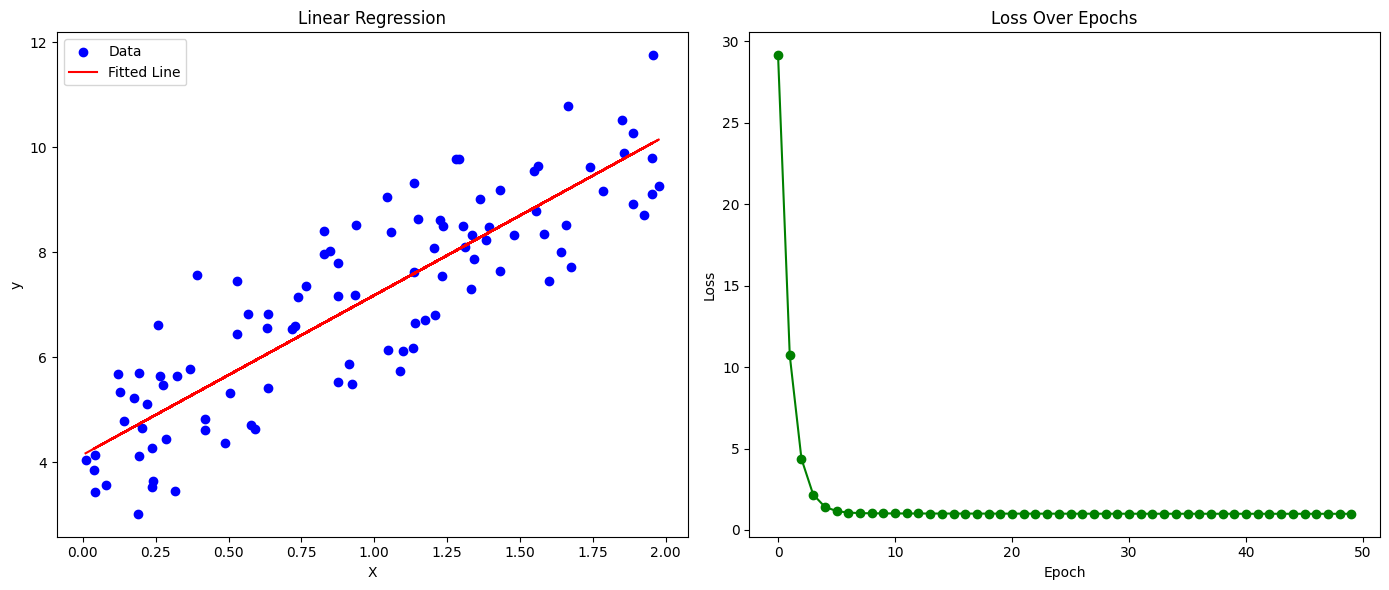

Final parameter: theta = [4.14346761 3.03828569]


In [122]:
import numpy as np
import matplotlib.pyplot as plt

# 실제 데이터 생성
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # 100개의 데이터 포인트, X는 0에서 2 사이
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3 * X + 잡음
print(X.shape, y.shape)

# 손실 함수 정의 (평균 제곱 오차)
def loss_function(theta, X, y):
    predictions = X @ theta
    return np.mean((predictions - y) ** 2)

# 기울기 계산 함수 정의
def gradient(theta, X, y):
    predictions = X @ theta
    return 2 / X.shape[0] * X.T @ (predictions - y)

# SGD 함수 정의
def sgd(X, y, learning_rate=0.01, num_epochs=50):
    m, n = X.shape
    theta = np.random.randn(n, 1)  # 초기 파라미터 값
    theta_history = []
    loss_history = []

    for epoch in range(num_epochs):
        grad = gradient(theta, X, y)  # 현재 파라미터에 대한 기울기 계산
        theta -= learning_rate * grad  # 파라미터 업데이트
        theta_history.append(theta.copy())
        loss = loss_function(theta, X, y)
        loss_history.append(loss)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

    return theta, theta_history, loss_history

# 데이터에 상수항을 추가
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # X에 상수항(절편) 추가
final_theta, theta_history, loss_history = sgd(X_b, y, learning_rate=0.1, num_epochs=50)

# 시각화
plt.figure(figsize=(14, 6))

# 데이터와 회귀선 시각화
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, X_b @ final_theta, color='red', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()

# 손실 시각화
plt.subplot(1, 2, 2)
plt.plot(range(len(loss_history)), loss_history, color='green', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')

plt.tight_layout()
plt.show()

print(f"Final parameter: theta = {final_theta.ravel()}")


In [ ]:
## 손실함수 수식: 평균제곱오차

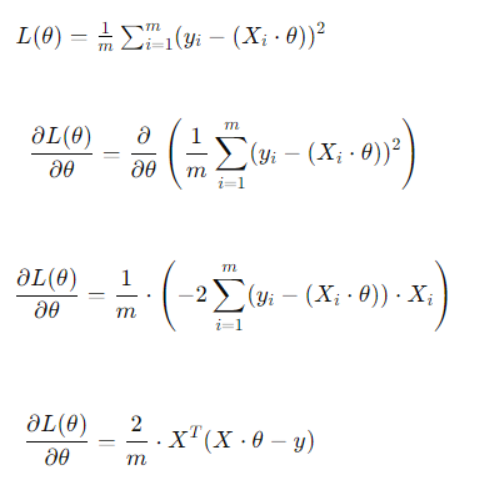